# 月ごとのオリーブオイルを使ったレシピの割合を求める

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime as dt

In [2]:
year = []
for i in range(2001, 2015):
    year.append(i)

col_names_recipe = ["id", "datetime"]
col_names_ingredient = ["id", "ingredient"]

In [3]:
total = [0 for i in range(165)]
ratio = [0 for i in range(165)]
olive = [0 for i in range(165)]

In [20]:
bar = tqdm(total=len(year))
for i in year:
    dates = []
    ids = []

    fileobj = open(f'/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{i}.csv', "r")
    while True:
        line = fileobj.readline()
        if line:
            dates.append(line[-11:-1])
            ids.append(line[:40])
        else:
            break

    data = np.vstack([np.array(ids), np.array(dates)]).T
    recipe = pd.DataFrame(data, columns=col_names_recipe)

    recipe["datetime"] = pd.to_datetime(recipe["datetime"])

    ingredient = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv",
                             names=col_names_ingredient, usecols=[0, 1])
            
    ingredient_oliveoil = ingredient[ingredient["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]

    df = pd.merge(ingredient_oliveoil, recipe, on="id", how="left")

    # 各月のレシピ数をtotalに格納
    if i != 2014:
        for j in range(1, 13):
            index = (i-2001)*12 + j-1
            if j == 1 | j == 3 | j == 5 | j == 7 | j == 8 | j == 10 | j ==12:
                count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 31))])
                count_2 = len(df[(df["datetime"] >= dt(i, j, 1)) & (df["datetime"] <= dt(i, j, 31))])
            elif j == 4 | j == 6 | j == 9 | j ==11:
                count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 30))])
                count_2 = len(df[(df["datetime"] >= dt(i, j, 1)) & (df["datetime"] <= dt(i, j, 30))])
            else:
                try:
                    count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 29))])
                    count_2 = len(df[(df["datetime"] >= dt(i, j, 1)) & (df["datetime"] <= dt(i, j, 29))])
                except:
                    count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 28))])
                    count_2 = len(df[(df["datetime"] >= dt(i, j, 1)) & (df["datetime"] <= dt(i, j, 28))])
            total[index] = count
            olive[index] = count_2
    else:
        for j in range(1, 10):
            index = (i-2001)*12 + j-1
            if j == 1 | j == 3 | j == 5 | j == 7 | j == 8 | j == 10 | j ==12:
                count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 31))])
                count_2 = len(df[(df["datetime"] >= dt(i, j, 1)) & (df["datetime"] <= dt(i, j, 31))])
            elif j == 4 | j == 6 | j == 9 | j ==11:
                count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 30))])
                count_2 = len(df[(df["datetime"] >= dt(i, j, 1)) & (df["datetime"] <= dt(i, j, 30))])
            else:
                try:
                    count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 29))])
                    count_2 = len(df[(df["datetime"] >= dt(i, j, 1)) & (df["datetime"] <= dt(i, j, 29))])
                except:
                    count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 28))])
                    count_2 = len(df[(df["datetime"] >= dt(i, j, 1)) & (df["datetime"] <= dt(i, j, 28))])
            total[index] = count
            olive[index] = count_2

    bar.update(1)

100%|██████████| 14/14 [00:20<00:00,  2.43s/it]

In [23]:
ratio = np.array(olive) / np.array(total)

In [24]:
ratio

array([0.05197133, 0.0652819 , 0.056231  , 0.04919908, 0.07348703,
       0.06436234, 0.06849315, 0.0789826 , 0.06555671, 0.07354555,
       0.06170213, 0.07440476, 0.0577957 , 0.07443366, 0.07351639,
       0.07829181, 0.07636888, 0.06599833, 0.06916996, 0.09299656,
       0.08308605, 0.05435897, 0.07100592, 0.06868867, 0.06070288,
       0.05093168, 0.05639535, 0.07862551, 0.05918789, 0.06278613,
       0.07860262, 0.07867647, 0.05442177, 0.06406523, 0.06559917,
       0.07593308, 0.05316172, 0.04930748, 0.07202216, 0.08286039,
       0.07176287, 0.07873594, 0.07918089, 0.05956813, 0.0613826 ,
       0.0684624 , 0.06689342, 0.05910987, 0.0596745 , 0.06517413,
       0.06403689, 0.06844106, 0.07942637, 0.08110781, 0.07995431,
       0.07579462, 0.06311433, 0.06594442, 0.05935484, 0.05659241,
       0.06121134, 0.05540488, 0.05757009, 0.06016598, 0.06172029,
       0.06124115, 0.06101978, 0.05880795, 0.05007333, 0.05254605,
       0.05722839, 0.05005866, 0.05237226, 0.05553476, 0.05426

In [26]:
x_axis = []
for i in range(165):
    y = i // 12 + 2001
    m = i % 12 + 1
    if m == 0:
        m = 12
    da = dt(y, m, 1)
    x_axis.append(da)

Text(0.5, 1.0, 'Ratio of Recipes Using Oliveoil')

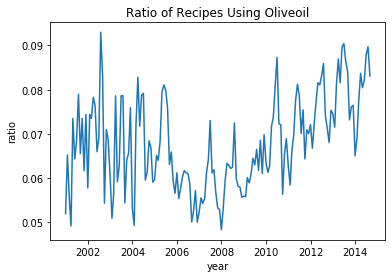

In [29]:
plt.plot(x_axis, ratio)
plt.xlabel("year")
plt.ylabel("ratio")
plt.title("Ratio of Recipes Using Oliveoil")

In [47]:
transition = []
for i in range(len(ratio)-1):
    transition.append(ratio[i+1] / ratio[i])

In [48]:
x_axis_2 = x_axis[1:]

In [60]:
transition_3 = transition[108:]
x_axis_3 = x_axis_2[108:]

In [62]:
y_axis = [1 for i in range(len(x_axis_3))]

Text(0.5, 1.0, 'Year-on-Year Rate of Ratio')

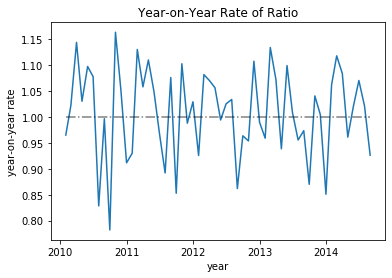

In [65]:
plt.plot(x_axis_3, transition_3)
plt.plot(x_axis_3, y_axis, c="000000", linestyle="-.", alpha=0.5)
plt.xlabel("year")
plt.ylabel("year-on-year rate")
plt.title("Year-on-Year Rate of Ratio")

In [163]:
for i in year:
    recipe = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{i}.csv",
                            names=col_names_recipe, usecols=[0, 7])

    ingredient = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv",
                              names=col_names_ingredient, usecols=[0, 1])

    ingredient_oliveoil = ingredient[ingredient["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]

    df = pd.merge(ingredient_oliveoil, recipe, on="id", how="left")

    df["datetime"] = pd.to_datetime(df["datetime"])

ValueError: ('Unknown string format:', '杏仁豆腐もゼリーも好き！！  両方一緒にたべた～い！  まだまだ改良の余地ありです。  ')

In [15]:
bar = tqdm(total=len(year))
for i in year:
    recipe = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{i}.csv",
                              names=col_names_recipe, usecols=[0, -1])

    recipe["datetime"] = pd.to_datetime(recipe["datetime"])

    bar.update(1)


    # 各月のレシピ数をtotalに格納
    if i != 2014:
        for j in range(1, 13):
            index = (i-2001)*12 + j-1
            if j == 1 | j == 3 | j == 5 | j == 7 | j == 8 | j == 10 | j ==12:
                count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 31))])
            elif j == 4 | j == 6 | j == 9 | j ==11:
                count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 30))])
            else:
                try:
                    count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 29))])
                except:
                    count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 28))])
            total[index] = count
    else:
        for j in range(1, 10):
            index = (i-2001)*12 + j-1
            if j == 1 | j == 3 | j == 5 | j == 7 | j == 8 | j == 10 | j ==12:
                count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 31))])
            elif j == 4 | j == 6 | j == 9 | j ==11:
                count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 30))])
            else:
                try:
                    count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 29))])
                except:
                    count = len(recipe[(recipe["datetime"] >= dt(i, j, 1)) & (recipe["datetime"] <= dt(i, j, 28))])
            total[index] = count

100%|██████████| 14/14 [00:07<00:00,  1.19it/s]

In [23]:
recipe = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{2008}.csv", names=[0, 1 ,2, 3, 4, 5, 6, 7, 8, 9])

In [160]:
recipe = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{2008}.csv",
                     names=col_names_recipe, usecols=[0, 7])

In [161]:
recipe["datetime"].value_counts()

2008/02/25                                                                     649
2008/02/15                                                                     612
2008/02/26                                                                     580
2008/03/03                                                                     560
2008/02/04                                                                     556
                                                                              ... 
１再８か月のアレルギーっ子のちびのために作った粉寒天のプリンです。寒天と甘さを控えめにして硬すぎないでつるんとした舌触りのプリンができました（^_^）      1
手作りキットと市販のトルティーヤ生地を使ってお手軽にピザが作れちゃいます！激辛だけど病みつきになっちゃいますよ～ｗ                        1
トマト缶を２缶使った、ジューシィなミートソースです。ピザやハンバーガーにもアレンジ出来ますよ。                                  1
さっぱりナムル。                                                                         1
超簡単♪仕上げのオールスパイスが効いています♪                                                          1
Name: datetime, Length: 376, dtype: int64

In [152]:
recipe.dropna(inplace=True)

In [153]:
recipe["datetime"][1]

'2008/01/01'

In [154]:
wrong_index = []

In [155]:
for i in range(len(recipe)):
    try:
        if len(recipe["datetime"][i]) != 10:
            wrong_index.append(i)
    except:
        wrong_index.append(i)

In [156]:
wrong_index

[5920,
 7710,
 11504,
 24755,
 56173,
 58916,
 65195,
 75188,
 76267,
 76969,
 78113,
 82240,
 88274,
 90243,
 91248,
 94241,
 94516,
 111882,
 112718,
 113506,
 115779,
 123804,
 124903,
 126632,
 139093,
 139843,
 141882]

In [157]:
recipe.drop(recipe.index[wrong_index], inplace=True)

In [158]:
recipe

,id,datetime
0,a09ce4a6ed776cde1a22b2613fe3185c097ea3e6,2008/01/01
1,b3ecc1207b0f79a029ba7a5b34deee01332a09c2,2008/01/01
2,13b534c097ac47b58876b9a67f35ae8a4ce4b819,2008/01/01
3,18547a46a73efeb19b216bf74ae7307eb4385fa3,2008/01/01
4,a0d32284038d3a05cc16e8d8de9b986b341e7a88,2008/01/01
...,...,...
144512,8d49466d1af2fb95a915a1782476838203514c3a,2008/12/31
144513,1fca0b652e04ca5a237db4571988cb654c118f75,2008/12/31
144514,fd563015f27090f1021b1beb9553fd7448d0f3f9,2008/12/31
144515,061cfe3fbe49d3d9df89ba76e75078f18f9d3466,2008/12/31


In [159]:
recipe["datetime"] = pd.to_datetime(recipe["datetime"])

ValueError: ('Unknown string format:', '09.2.9話題入り★青のりとチーズの塩味の卵焼きです。お弁当に、朝食にいかがですか？')

In [168]:
val = pd.read_csv('/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe2008.csv', usecols=[-1]).values

ValueError: Usecols do not match columns, columns expected but not found: [-1]

In [167]:
val

array([['f7fb606063ea81b7e2d031b7869fa67ba34bac3f'],
       ['bae1e2db939c2e0193f84e321b856781f0418679'],
       ['f7fb606063ea81b7e2d031b7869fa67ba34bac3f'],
       ...,
       ['7c4d1d19a075f2d9c40bafd71c839dbe68473d28'],
       ['41e2e17f0c228e26868aeb400d3831f35f27dd2a'],
       ['8d1cd7ddb913cbedcbb402b766d55e0cb8a04a25']], dtype=object)

In [169]:
val = np.loadtxt('/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe2008.csv', delimiter=',', usecols=[-1])

ValueError: could not convert string to float: '2008/01/01'

In [4]:
import csv

In [5]:
dates = []
ids = []

fileobj = open('/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe2010.csv', "r")
while True:
  line = fileobj.readline()
  if line:
    dates.append(line[-11:-1])
    ids.append(line[:40])
  else:
    break

In [6]:
print(len(dates), len(ids))

219549 219549


In [7]:
np.array(dates).T

array(['2010/01/01', '2010/01/01', '2010/01/01', ..., '2010/12/31',
       '2010/12/31', '2010/12/31'], dtype='<U10')